In [295]:
import pickle
import pandas as pd
from collections import defaultdict
import re
import numpy as np

In [294]:
!ls -lhrt ../data/intermediate |tail

-rw-r--r--  1 navy  staff    23K Sep  8 22:54 report_urls1631134491406206000.pickle
-rw-r--r--  1 navy  staff    30K Sep  8 22:54 scraped_financials1631134491406206000.csv
-rw-r--r--  1 navy  staff    25K Sep  8 22:59 report_urls1631134788788960000.pickle
-rw-r--r--  1 navy  staff    33K Sep  8 22:59 scraped_financials1631134788788960000.csv
-rw-r--r--  1 navy  staff    28K Sep  8 23:04 report_urls1631135091248067000.pickle
-rw-r--r--  1 navy  staff    37K Sep  8 23:04 scraped_financials1631135091248067000.csv
-rw-r--r--  1 navy  staff    29K Sep  8 23:09 report_urls1631135362098646000.pickle
-rw-r--r--  1 navy  staff    37K Sep  8 23:09 scraped_financials1631135362098646000.csv
-rw-r--r--  1 navy  staff    30K Sep  8 23:14 report_urls1631135657289499000.pickle
-rw-r--r--  1 navy  staff    40K Sep  8 23:14 scraped_financials1631135657289499000.csv


In [271]:
with open('../data/intermediate/df_parsed1631115677836174000.pickle', 'rb') as f:
    dfs = pickle.load(f)
    
with open('../data/intermediate/report_urls1631111629105075000.pickle', 'rb') as f:
    urls = pickle.load(f)

In [272]:
len(dfs)

357

In [273]:
dfs = [df for df in dfs if df is not None]
len(dfs)

357

In [274]:
for i, df in enumerate(dfs):
    cik = df.loc[0, 'CIK']
    dfs[i] = dfs[i].loc[0:0, ~dfs[i].columns.isna()]
    dfs[i] = dfs[i].loc[:, ~dfs[i].columns.duplicated()]
#     dfs[i].dropna(axis=1, inplace=True)

In [275]:
dfs[0].head()

,ASSETS,Current assets:,Cash and equivalents,Short-term investments,Notes receivable,"Accounts receivable, less allowance for doubtful accounts of $9,645 and $12,253, respectively",Inventories,Other current assets,Total current assets,"Property and equipment, less accumulated depreciation and amortization of $172,717 and $205,835, respectively",...,Stockholders equity:,"Preferred stock, $0.01 par value, 10,000 shares authorized; none outstanding","Common stock, $0.01 par value, 990,000 shares authorized; shares issued and outstanding: 389,284 and 405,656, respectively",Retained deficit,Accumulated other comprehensive income,Total stockholders equity,Total liabilities and stockholders equity,date_filled,CIK,url
0,None,None,545818000.0,98357000.0,40590000.0,112771000.0,90395000.0,56982000.0,944913000.0,40012000.0,...,None,None,2336961000.0,None,65736000.0,1112175000.0,1815357000.0,2009-05-29,738076,https://www.sec.gov/Archives/edgar/data/0000738076/000095012309025431/b76396cce10vk.htm


In [276]:
column_sets = []

for i, df in enumerate(dfs):
    try:
        column_sets.append(set(df.columns))
    except TypeError:
        print(i)

In [277]:
column_sets[0]

{'ASSETS',
 'Accounts payable',
 'Accounts receivable, less allowance for doubtful accounts of  $9,645 and $12,253, respectively',
 'Accrued liabilities and other',
 'Accumulated other comprehensive income',
 'CIK',
 'Cash and equivalents',
 'Common stock, $0.01\xa0par value, 990,000\xa0shares  authorized; shares issued and outstanding: 389,284 and 405,656,  respectively',
 'Current assets:',
 'Current liabilities:',
 'Current portion of long-term debt',
 'Deferred taxes and long-term obligations',
 'Deposits and other assets',
 'Goodwill',
 'Intangible assets, net',
 'Inventories',
 'LIABILITIES AND STOCKHOLDERS\x92 EQUITY',
 'Long-term debt',
 'Notes receivable',
 'Other current assets',
 'Preferred stock, $0.01\xa0par value, 10,000\xa0shares  authorized; none outstanding',
 'Property and equipment, less accumulated depreciation and  amortization of $172,717 and $205,835, respectively',
 'Retained deficit',
 'Short-term investments',
 'Stockholders\x92 equity:',
 'Total assets',
 'To

In [278]:
renames = {
        r'Total stockholders.*equity': 'total_stockholders_equity',
        r'Total assets': 'total_assets',
        r'Total current assets': 'total_current_assets',
        r'Current assets': 'current_assets',
        r'Long-term debt': 'long_term_debt',
        r'Current liabilities': 'current_liabilities',
        r'Total liabilities': 'total_liabilities',
        r'Total current liabilities': 'total_current_liabilities',
        'Date filled': 'date_filled',
        'CIK': 'CIK',
        'url': 'url'
    }

def rename_col(col):
    for old_name, new_name in renames.items():
        matches = re.findall(old_name, col)
        if len(matches) == 1:
            return new_name
    return col

for i, df in enumerate(dfs):
    dfs[i].rename(columns=rename_col, inplace=True)

In [279]:
for col in dfs[0].columns:
    print(col)

ASSETS
current_assets
Cash and equivalents
Short-term investments
Notes receivable
Accounts receivable, less allowance for doubtful accounts of  $9,645 and $12,253, respectively
Inventories
Other current assets
total_current_assets
Property and equipment, less accumulated depreciation and  amortization of $172,717 and $205,835, respectively
Goodwill
Intangible assets, net
Deposits and other assets
total_assets
LIABILITIES AND STOCKHOLDERS EQUITY
current_liabilities
Accounts payable
Current portion of long-term debt
Accrued liabilities and other
total_current_liabilities
Deferred taxes and long-term obligations
long_term_debt
Stockholders equity:
Preferred stock, $0.01 par value, 10,000 shares  authorized; none outstanding
Common stock, $0.01 par value, 990,000 shares  authorized; shares issued and outstanding: 389,284 and 405,656,  respectively
Retained deficit
Accumulated other comprehensive income
total_stockholders_equity
total_liabilities
date_filled
CIK
url


In [280]:
common_data = defaultdict(list)
for col in renames.values():
    for df in dfs:
        try:
            value = df.loc[0, col]
        except KeyError:
            value = None
        if (col not in ['date_filled', 'CIK', 'url']) and (type(value) != float):
            value = None
        common_data[col].append(value)

In [281]:
for col in renames.values():
    print(col, len(common_data[col]))

total_stockholders_equity 357
total_assets 357
total_current_assets 357
current_assets 357
long_term_debt 357
current_liabilities 357
total_liabilities 357
total_current_liabilities 357
date_filled 357
CIK 357
url 357


In [282]:
companies = pd.DataFrame(data=common_data)
companies['CIK'] = companies['CIK'].astype('category')

In [283]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_stockholders_equity  111 non-null    float64       
 1   total_assets               160 non-null    float64       
 2   total_current_assets       166 non-null    float64       
 3   current_assets             3 non-null      float64       
 4   long_term_debt             64 non-null     float64       
 5   current_liabilities        1 non-null      float64       
 6   total_liabilities          61 non-null     float64       
 7   total_current_liabilities  166 non-null    float64       
 8   date_filled                357 non-null    datetime64[ns]
 9   CIK                        357 non-null    category      
 10  url                        357 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(8), object(1)
memory usage: 

In [284]:
pd.set_option('max_colwidth', 400)

def get_fiscal_year(dt):
    if dt.month < 6:
        return dt.year - 1
    else:
        return dt.year

companies['fiscal_year'] = companies['date_filled'].apply(lambda x: get_fiscal_year(x))
companies[['total_current_assets', 'total_current_liabilities', 'url', 'fiscal_year']]

,total_current_assets,total_current_liabilities,url,fiscal_year
0,9.449130e+08,510453000.0,https://www.sec.gov/Archives/edgar/data/0000738076/000095012309025431/b76396cce10vk.htm,2008
1,8.099050e+08,504461000.0,https://www.sec.gov/Archives/edgar/data/0000738076/000095013508005146/b711153ce10vk.htm,2007
2,8.976820e+08,640068000.0,https://www.sec.gov/Archives/edgar/data/0000738076/000095013507004539/b659553ce10vk.htm,2007
3,1.249345e+09,471281000.0,https://www.sec.gov/Archives/edgar/data/0000738076/000095013506004986/b61877cce10vk.htm,2006
4,9.775090e+08,309560000.0,https://www.sec.gov/Archives/edgar/data/0000738076/000073807605000011/edgar.htm,2005
...,...,...,...,...
352,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000921768/000095014408002009/g12314e10vk.htm,2007
353,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000921768/000095014407001788/g05652e10vk.htm,2006
354,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000921768/000095014406002400/g00205e10vk.htm,2004
355,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000921768/000095014405002626/g93817e10vk.htm,2004


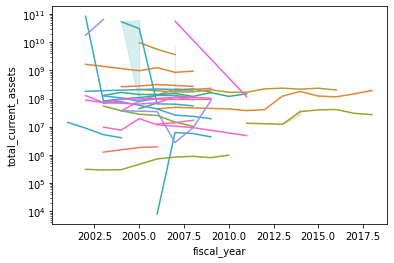

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.lineplot(data=companies, x='fiscal_year', y='total_current_assets', hue='CIK', ax=ax, legend=False)
ax.set(yscale='log')
plt.show()

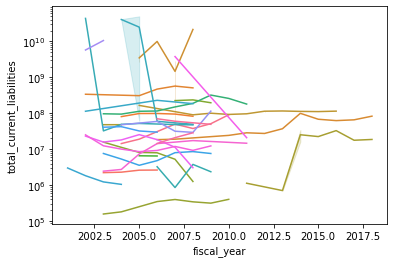

In [286]:
fig, ax = plt.subplots()
sns.lineplot(data=companies, x='fiscal_year', y='total_current_liabilities', hue='CIK', ax=ax, legend=False)
ax.set(yscale='log')
plt.show()

In [287]:
companies['gearing'] = companies['long_term_debt'] / companies['total_stockholders_equity']
companies['debt_to_assets'] = companies['long_term_debt'] / companies['total_assets']
companies['current_ratio'] = companies['total_current_assets'] / companies['total_current_liabilities']

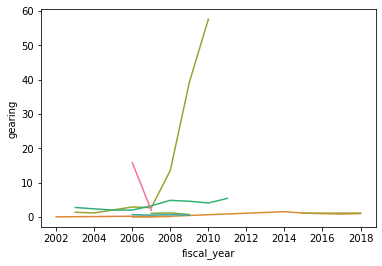

In [288]:
sns.lineplot(data=companies, x='fiscal_year', y='gearing', hue='CIK', legend=False)
plt.show()

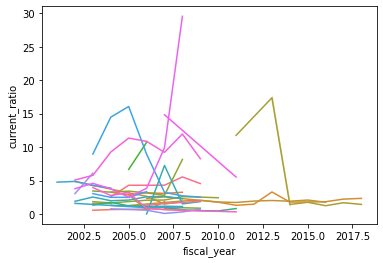

In [289]:
sns.lineplot(data=companies, x='fiscal_year', y='current_ratio', hue='CIK', legend=False)
plt.show()

In [214]:
len(urls)

313